# **STAGE PONTS INSTRUMENTES - Notebook 8.1**

## Table of Contents

### 0. [Bibliothèques](#0/-Bibliothèques)
### I. [Chargement de la data](#I/-Chargement-de-la-data)
### II. [Tri des camions par vitesse](#II/-Tri-des-camions-par-vitesse)
### III. [Remise à l'échelle](#III/-Remise-à-l'échelle)
### IV. [Facteurs d'amplitude entre calibration_trucks[0] pour référence](#IV/-Facteurs-d'amplitude-avec-calibration_trucks[0]-pour-référence)
1. [Calcul des facteurs d'amplitude entre truck[0] et les autres](#IV.1-Calcul-des-facteurs-d'amplitude-entre-truck[0]-et-les-autres)
2. [Régression linéaire sur ces valeurs](#IV.2-Régression-linéaire-sur-ces-valeurs)

### V. [Réitération pour tous les camions](#V/-Réitération-pour-tous-les-camions)
### VI. [Sauvegarde des facteurs](#VI/-Sauvegarde-des-facteurs)


**Comme nous l'avons vu dans le Notebook N8.1, il y a un facteur d'amplitude entre les LI qui semble venir des vitesses des camions**

## 0/ Bibliothèques

In [1]:
from Bwifsttar import load_senlis_modified
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


## I/ Chargement de la data

In [2]:
calibration_trucks,traffic_trucks = load_senlis_modified(selected=6)

## II/ Tri des camions par vitesse

In [3]:
idx_70 = [0,2,5,7]
idx_90 = [1,4,8,9,10,11]
idx_80 = [3,6]

In [4]:
truck70 = calibration_trucks[0]
truck90 = calibration_trucks[1]

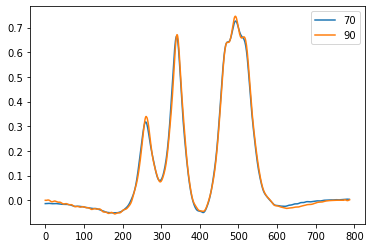

In [5]:
plt.plot(truck70.signals,label="70")
plt.plot(truck90.signals,label="90")
plt.legend()

## III/ Remise à l'échelle

In [6]:
meters70 = truck70.speed*truck70.time
meters70 = meters70 - meters70[truck70.peaks[0]]
meters90 = truck90.speed*truck90.time
meters90 = meters90 - meters90[truck90.peaks[0]]


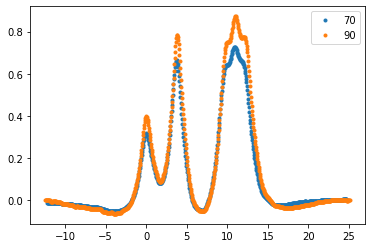

In [7]:

plt.plot(meters70,truck70.signals,".",label="70")
plt.plot(meters90,(1.17)*truck90.signals,".",label="90")
plt.legend()

## IV/ Facteurs d'amplitude avec calibration_trucks[0] pour référence

### IV.1 Calcul des facteurs d'amplitude entre truck[0] et les autres

In [8]:
truck0 =calibration_trucks[3]

In [9]:
list_facts=[]
for i in range(1,len(calibration_trucks)-2):
    print("camion n° :",i)
    print("Vitesse :",calibration_trucks[i].speed)
    
    fact = truck0.peaks[3]/calibration_trucks[i].peaks[3]
    print("Fact : ",fact)
    list_facts.append((calibration_trucks[i].speed,fact))
    print("\n")

list_facts = np.array(list_facts)

camion n° : 1
Vitesse : 24.380991984594182
Fact :  1.1158536585365855


camion n° : 2
Vitesse : 23.272699098967962
Fact :  1.111336032388664


camion n° : 3
Vitesse : 23.630769230769232
Fact :  1.0


camion n° : 4
Vitesse : 24.00002912772182
Fact :  1.111336032388664


camion n° : 5
Vitesse : 21.63376871440886
Fact :  1.080708661417323


camion n° : 6
Vitesse : 23.630778718660313
Fact :  1.1068548387096775


camion n° : 7
Vitesse : 18.731689060807692
Fact :  0.9786096256684492


camion n° : 8
Vitesse : 18.963018634210332
Fact :  0.9838709677419355


camion n° : 9
Vitesse : 18.50599705565925
Fact :  0.9803571428571428




### IV.2 Régression linéaire sur ces valeurs

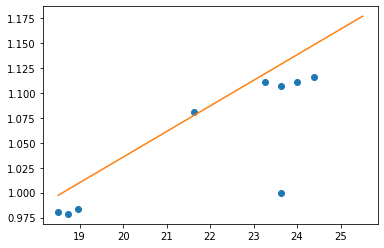

In [10]:
speeds=list_facts[:,0]
facts = list_facts[:,1]
plt.figure()
plt.plot(speeds,facts,'o')
x =np.arange(min(speeds),max(speeds)+2)
y = 0.0257*x+0.5217
plt.plot(x,y)

plt.show()

In [11]:
x = sm.add_constant(speeds)
model = sm.OLS(facts, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     14.47
Date:                Tue, 11 Aug 2020   Prob (F-statistic):            0.00669
Time:                        11:10:09   Log-Likelihood:                 17.535
No. Observations:                   9   AIC:                            -31.07
Df Residuals:                       7   BIC:                            -30.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5862      0.123      4.758      0.0

/home/franck/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
model.params

array([0.58616061, 0.02131378])

## V/ Réitération pour tous les camions

VITESSE :  24.380991984594182
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.0


camion n° : 1
Vitesse : 23.272699098967962
Fact :  0.9959514170040485


camion n° : 2
Vitesse : 23.630769230769232
Fact :  0.8961748633879781


camion n° : 3
Vitesse : 24.00002912772182
Fact :  0.9959514170040485


camion n° : 4
Vitesse : 21.63376871440886
Fact :  0.968503937007874


camion n° : 5
Vitesse : 23.630778718660313
Fact :  0.9919354838709677


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.8770053475935828


camion n° : 7
Vitesse : 18.963018634210332
Fact :  0.8817204301075269


camion n° : 8
Vitesse : 18.50599705565925
Fact :  0.8785714285714286


Coeff dir :  0.01910087734590215
Const :  0.5253024046572354





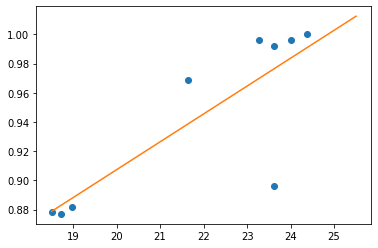

VITESSE :  23.272699098967962
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.0040650406504066


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.0


camion n° : 2
Vitesse : 23.630769230769232
Fact :  0.8998178506375227


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.0


camion n° : 4
Vitesse : 21.63376871440886
Fact :  0.9724409448818898


camion n° : 5
Vitesse : 23.630778718660313
Fact :  0.9959677419354839


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.8805704099821747


camion n° : 7
Vitesse : 18.963018634210332
Fact :  0.8853046594982079


camion n° : 9
Vitesse : 21.333341568157582
Fact :  0.9481765834932822


Coeff dir :  0.018892136098498824
Const :  0.5351006397347133





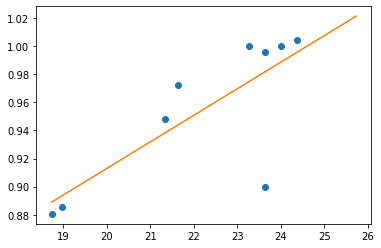

VITESSE :  23.630769230769232
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.1158536585365855


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.111336032388664


camion n° : 2
Vitesse : 23.630769230769232
Fact :  1.0


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.111336032388664


camion n° : 4
Vitesse : 21.63376871440886
Fact :  1.080708661417323


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.1068548387096775


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.9786096256684492


camion n° : 7
Vitesse : 18.963018634210332
Fact :  0.9838709677419355


camion n° : 8
Vitesse : 18.50599705565925
Fact :  0.9803571428571428


Coeff dir :  0.02131378386768351
Const :  0.5861606100748418





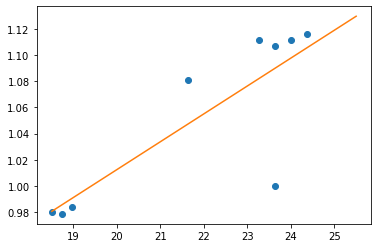

VITESSE :  24.00002912772182
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.0040650406504066


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.0


camion n° : 2
Vitesse : 23.630769230769232
Fact :  0.8998178506375227


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.0


camion n° : 4
Vitesse : 21.63376871440886
Fact :  0.9724409448818898


camion n° : 5
Vitesse : 23.630778718660313
Fact :  0.9959677419354839


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.8805704099821747


camion n° : 7
Vitesse : 18.963018634210332
Fact :  0.8853046594982079


camion n° : 9
Vitesse : 21.333341568157582
Fact :  0.9481765834932822


Coeff dir :  0.018892136098498824
Const :  0.5351006397347133





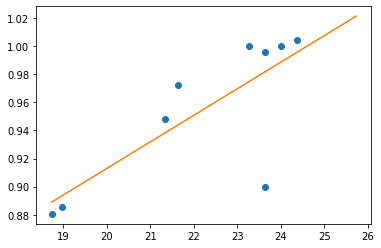

VITESSE :  21.63376871440886
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.032520325203252


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.0283400809716599


camion n° : 2
Vitesse : 23.630769230769232
Fact :  0.9253187613843351


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.0283400809716599


camion n° : 4
Vitesse : 21.63376871440886
Fact :  1.0


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.0241935483870968


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.9055258467023173


camion n° : 7
Vitesse : 18.963018634210332
Fact :  0.910394265232975


camion n° : 8
Vitesse : 18.50599705565925
Fact :  0.9071428571428571


Coeff dir :  0.019722044088858318
Const :  0.5423854096867395





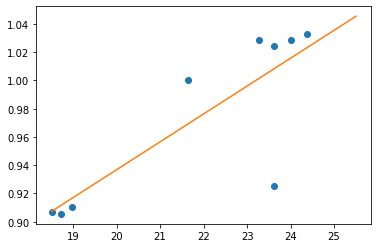

VITESSE :  23.630778718660313
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.008130081300813


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.0040485829959513


camion n° : 2
Vitesse : 23.630769230769232
Fact :  0.9034608378870674


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.0040485829959513


camion n° : 4
Vitesse : 21.63376871440886
Fact :  0.9763779527559056


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.0


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.8841354723707665


camion n° : 7
Vitesse : 18.963018634210332
Fact :  0.8888888888888888


camion n° : 9
Vitesse : 21.333341568157582
Fact :  0.9520153550863724


Coeff dir :  0.018968622479464417
Const :  0.5372670390858656





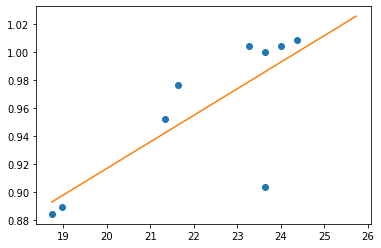

VITESSE :  18.731689060807692
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.1402439024390243


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.1356275303643724


camion n° : 2
Vitesse : 23.630769230769232
Fact :  1.0218579234972678


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.1356275303643724


camion n° : 4
Vitesse : 21.63376871440886
Fact :  1.1043307086614174


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.1310483870967742


camion n° : 6
Vitesse : 18.731689060807692
Fact :  1.0


camion n° : 7
Vitesse : 18.963018634210332
Fact :  1.0053763440860215


camion n° : 8
Vitesse : 18.50599705565925
Fact :  1.0017857142857143


Coeff dir :  0.021779658924900608
Const :  0.5989728638469698





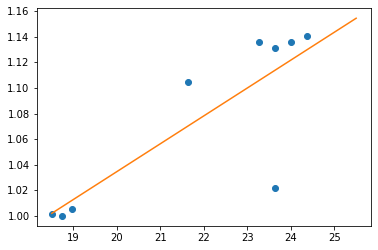

VITESSE :  18.963018634210332
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.1341463414634145


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.1295546558704452


camion n° : 2
Vitesse : 23.630769230769232
Fact :  1.0163934426229508


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.1295546558704452


camion n° : 4
Vitesse : 21.63376871440886
Fact :  1.0984251968503937


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.125


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.9946524064171123


camion n° : 7
Vitesse : 18.963018634210332
Fact :  1.0


camion n° : 9
Vitesse : 21.333341568157582
Fact :  1.0710172744721689


Coeff dir :  0.021339700289397436
Const :  0.6044254189715986





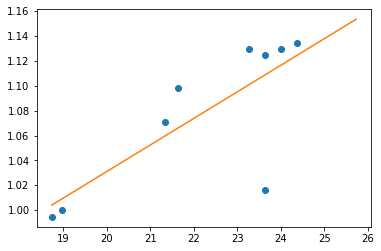

VITESSE :  18.50599705565925
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.1382113821138211


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.1336032388663968


camion n° : 2
Vitesse : 23.630769230769232
Fact :  1.0200364298724955


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.1336032388663968


camion n° : 4
Vitesse : 21.63376871440886
Fact :  1.1023622047244095


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.1290322580645162


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.9982174688057041


camion n° : 7
Vitesse : 18.963018634210332
Fact :  1.003584229390681


camion n° : 8
Vitesse : 18.50599705565925
Fact :  1.0


Coeff dir :  0.02174083600346588
Const :  0.597905176032625





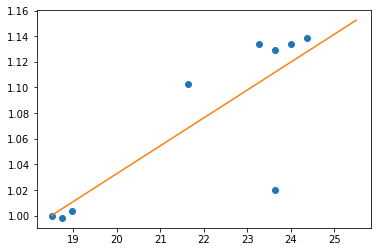

VITESSE :  21.333341568157582
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.0589430894308942


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.0546558704453441


camion n° : 2
Vitesse : 23.630769230769232
Fact :  0.9489981785063752


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.0546558704453441


camion n° : 4
Vitesse : 21.63376871440886
Fact :  1.0255905511811023


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.0504032258064515


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.928698752228164


camion n° : 7
Vitesse : 18.963018634210332
Fact :  0.9336917562724014


camion n° : 9
Vitesse : 21.333341568157582
Fact :  1.0


Coeff dir :  0.019924702241534194
Const :  0.5643470309752743





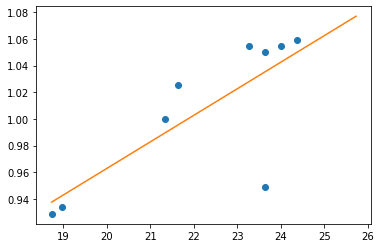

VITESSE :  18.96294211024312
Camion de réféence : 
camion n° : 0
Vitesse : 24.380991984594182
Fact :  1.136178861788618


camion n° : 1
Vitesse : 23.272699098967962
Fact :  1.131578947368421


camion n° : 2
Vitesse : 23.630769230769232
Fact :  1.018214936247723


camion n° : 3
Vitesse : 24.00002912772182
Fact :  1.131578947368421


camion n° : 4
Vitesse : 21.63376871440886
Fact :  1.1003937007874016


camion n° : 5
Vitesse : 23.630778718660313
Fact :  1.127016129032258


camion n° : 6
Vitesse : 18.731689060807692
Fact :  0.9964349376114082


camion n° : 7
Vitesse : 18.963018634210332
Fact :  1.0017921146953406


camion n° : 8
Vitesse : 18.50599705565925
Fact :  0.9982142857142857


Coeff dir :  0.021702013082031096
Const :  0.5968374882182821





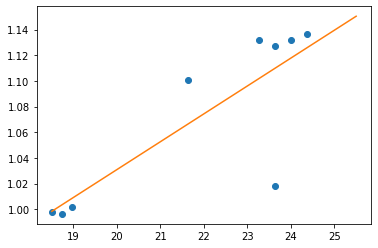

In [13]:
trucks_calculables = [truck for truck in calibration_trucks if(len(truck.weights) == len(truck.peaks))]


list_final_facts = np.empty(len(trucks_calculables),dtype=object)
z=0

for truck in trucks_calculables:
    truck0 =truck
    print("VITESSE : ",truck0.speed)
    list_facts=[]
    print("Camion de réféence : ",)
    for i in [x for x in range(len(trucks_calculables)-1) if x != i]:        
        print("camion n° :",i)
        print("Vitesse :",trucks_calculables[i].speed)
        
        try:
        
            fact = truck0.peaks[3]/trucks_calculables[i].peaks[3]
        except:
            continue
            
        print("Fact : ",fact)
        list_facts.append((trucks_calculables[i].speed,fact))
        print("\n")

    try:
        
        list_facts = np.array(list_facts)
        list_final_facts[z] = list_facts
        z+=1
        speeds=list_facts[:,0]
        facts = list_facts[:,1]
        plt.figure()
        plt.plot(speeds,facts,'o')
        
        x = sm.add_constant(speeds)
        model = sm.OLS(facts, x).fit()
        
        x =np.arange(min(speeds),max(speeds)+2)
        params=model.params
        y = params[1]*x+params[0]
        print("Coeff dir : ",params[1])
        print("Const : ",params[0])
        print("\n\n")
        plt.plot(x,y)

        plt.show()
    except:
        continue


## VI/ Sauvegarde des facteurs

In [14]:
np.save('Saved/facteurs.npy',list_final_facts)